In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms

In [19]:
def mnist_loader(batch_size=128, root='data/'):
    compose = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((0.5,), (0.5,))
                                 ])
    train_dataset = torchvision.datasets.MNIST(root=root, train=True,
                                            transform=compose, download=True)
    test_dataset = torchvision.datasets.MNIST(root=root, train=False,
                                            transform=compose, download=True)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
    
    return train_loader, test_loader

In [20]:
train_loader, test_loader = mnist_loader()

In [25]:
class Encoder(nn.Module):
    def __init__(self, in_dim, hid_dim, z_dim):
        super(Encoder, self).__init__()
        
        self.layers = nn.Sequential(
                nn.Linear(in_dim, hid_dim),
                nn.Tanh(),
                nn.Linear(hid_dim, hid_dim),
                nn.Tanh(),
                nn.Linear(hid_dim, z_dim),
                nn.Tanh(),
        )
    
    def forward(self, x):
        return self.layers(x)

In [33]:
class Decoder(nn.Module):
    def __init__(self, out_dim, hid_dim, z_dim):
        super(Decoder, self).__init__()
        
        self.layers = nn.Sequential(
                nn.Linear(z_dim, hid_dim),
                nn.Tanh(),
                nn.Linear(hid_dim, hid_dim),
                nn.Tanh(),
                nn.Linear(hid_dim, out_dim),
                nn.Tanh(),
        )
    
    def forward(self, x):
        return self.layers(x)

In [28]:
def loss_fun(x, x_hat):
    loss = torch.sum((x - x_hat) ** 2)
    return loss / x.size(0)

In [34]:
n_epochs = 1000
l_rate = 1e-4

data_dim = 28 * 28
hid_dim = 512
z_dim = 64

encoder = Encoder(data_dim, hid_dim, z_dim)
decoder = Decoder(data_dim, hid_dim, z_dim)

optimizer = torch.optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=l_rate)

Epoch: 0/1000 Loss: 140.3396


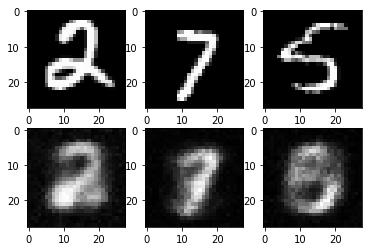

Epoch: 1/1000 Loss: 84.5669


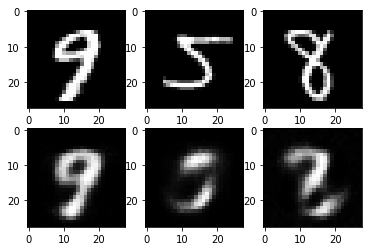

Epoch: 2/1000 Loss: 58.3671


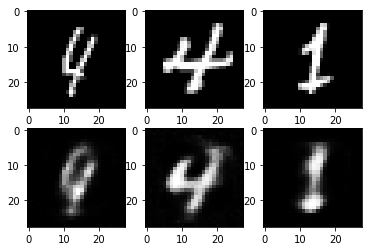

Epoch: 3/1000 Loss: 48.1970


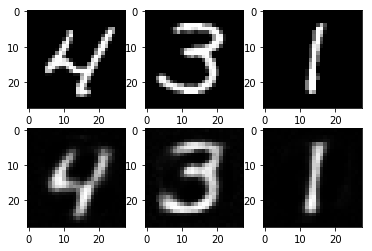

KeyboardInterrupt: 

In [36]:
for i in range(n_epochs):
    for images, _ in train_loader:
        flatten_images = images.reshape(images.size(0), -1)
        
        z = encoder(flatten_images)
        x_hat = decoder(z)
        
        loss = loss_fun(flatten_images, x_hat)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if i % 1 == 0:
        print(f'Epoch: {i}/{n_epochs} Loss: {loss.item():.4f}')

        encoder.eval()
        decoder.eval()
        with torch.no_grad():
            fig, ((ax00, ax01, ax02), (ax10, ax11, ax12)) = plt.subplots(2,3)
            ax00.imshow(flatten_images[0].reshape(28, 28).numpy(), cmap='gray')
            ax01.imshow(flatten_images[1].reshape(28, 28).numpy(), cmap='gray')
            ax02.imshow(flatten_images[2].reshape(28, 28).numpy(), cmap='gray')
            ax10.imshow(x_hat[0].detach().reshape(28, 28).numpy(), cmap='gray')
            ax11.imshow(x_hat[1].detach().reshape(28, 28).numpy(), cmap='gray')
            ax12.imshow(x_hat[2].detach().reshape(28, 28).numpy(), cmap='gray')
            plt.show()

        encoder.train()
        decoder.train()

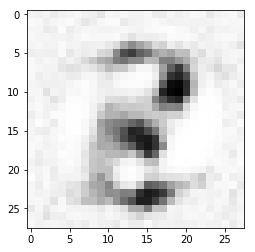

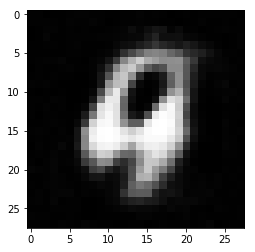

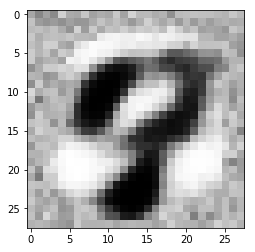

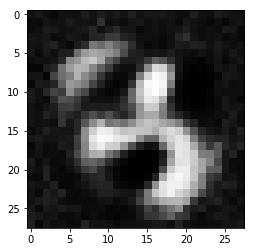

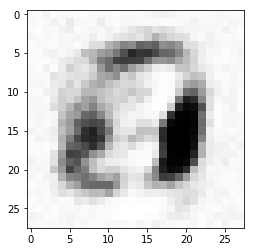

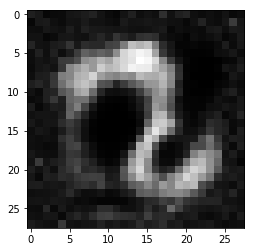

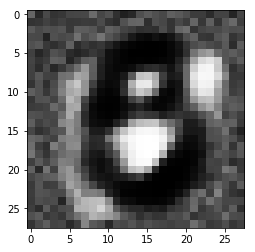

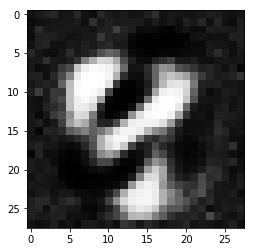

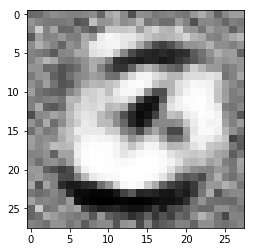

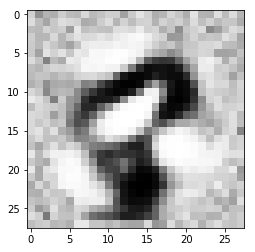

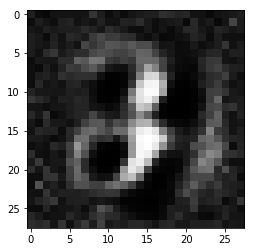

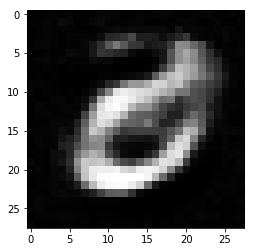

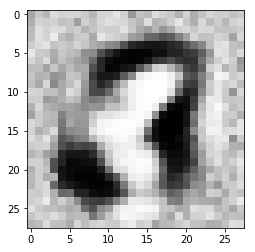

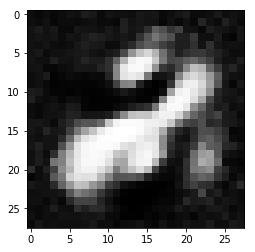

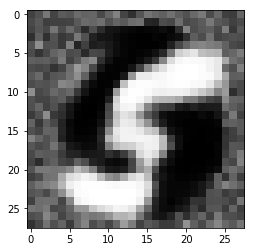

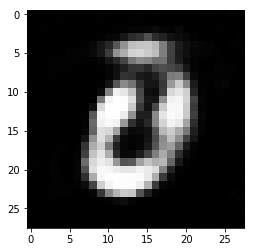

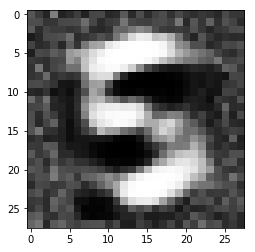

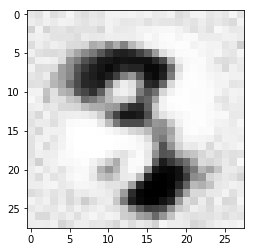

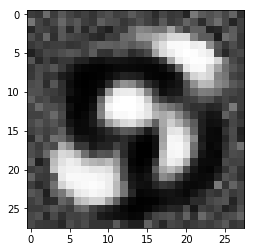

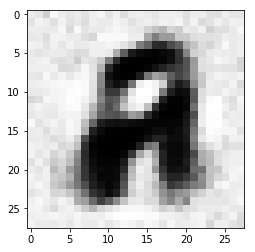

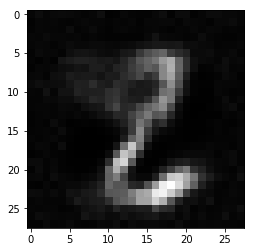

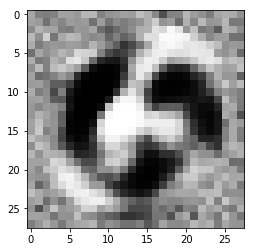

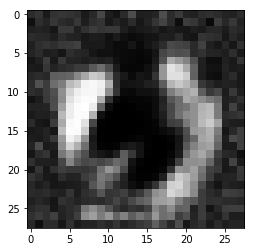

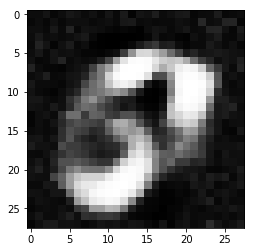

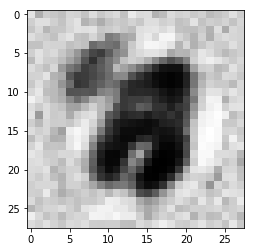

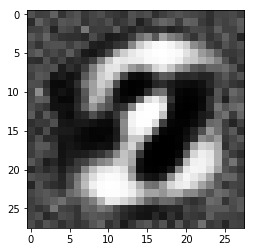

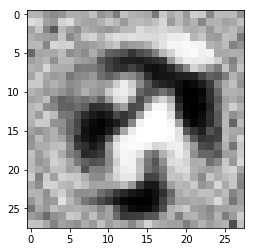

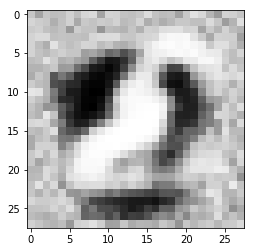

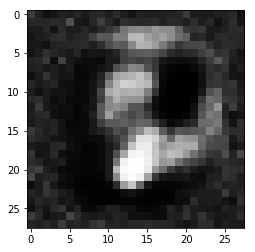

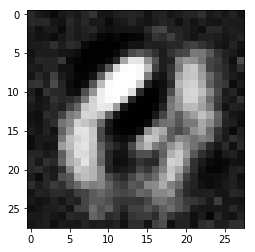

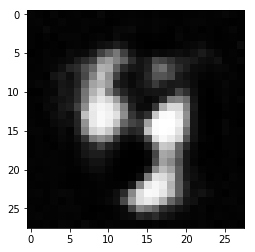

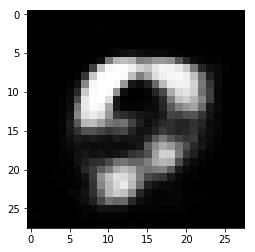

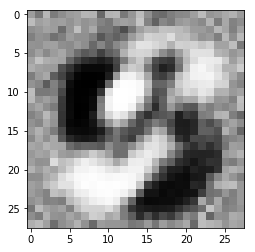

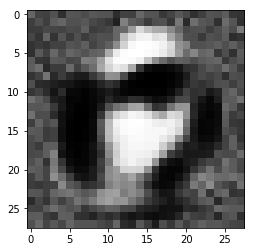

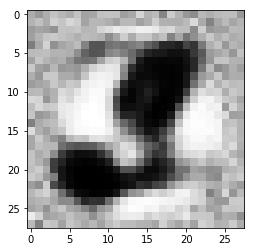

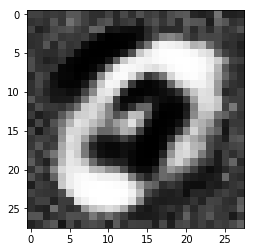

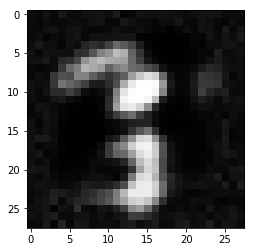

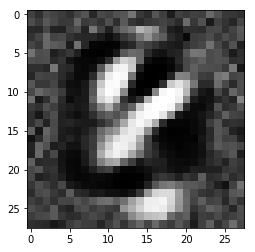

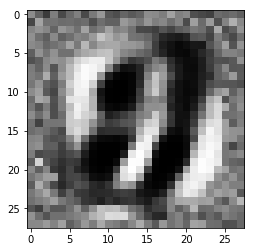

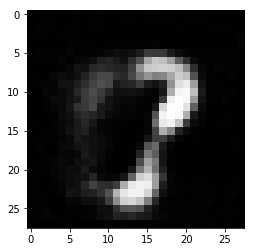

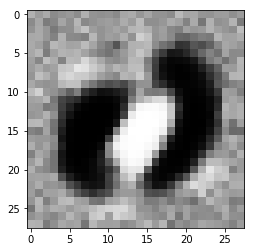

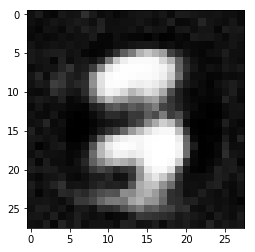

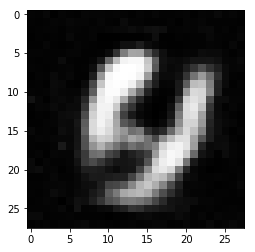

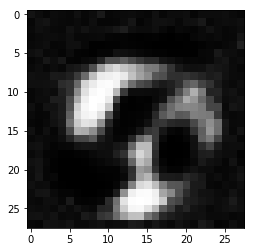

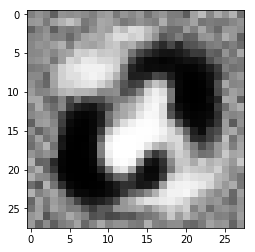

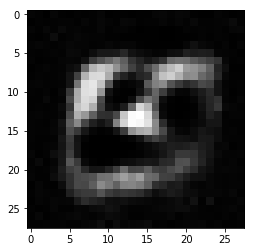

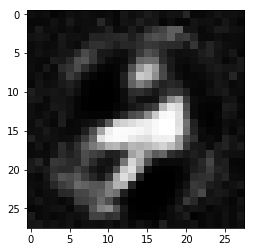

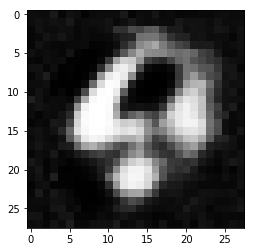

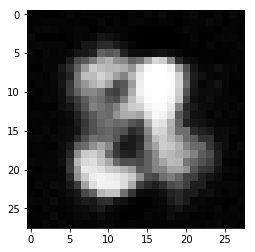

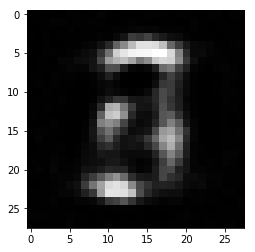

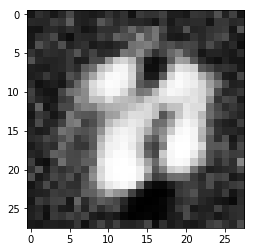

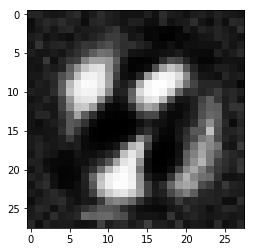

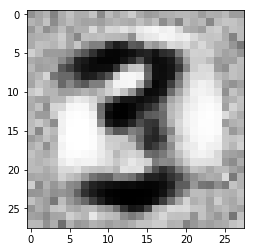

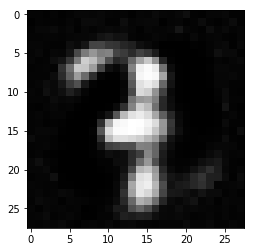

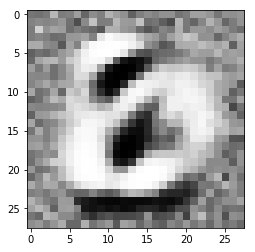

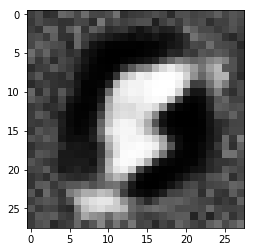

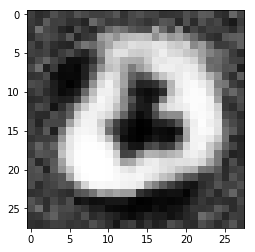

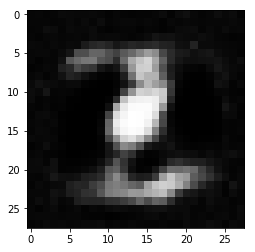

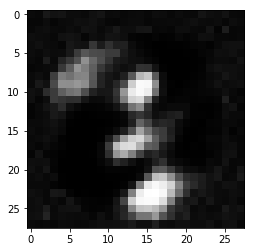

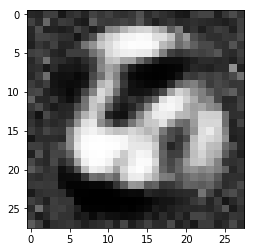

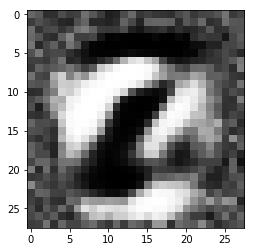

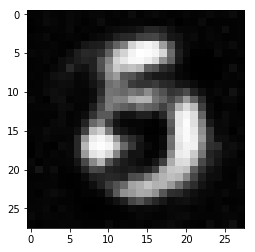

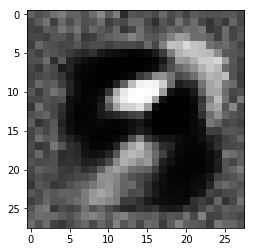

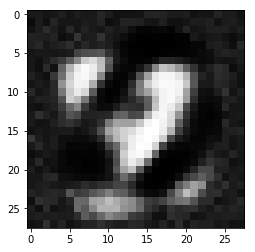

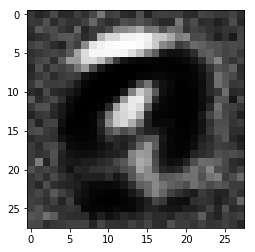

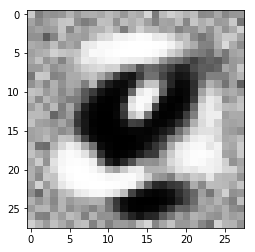

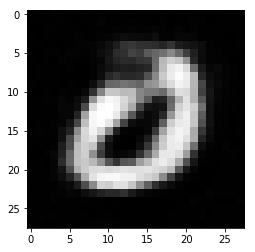

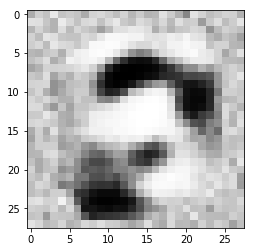

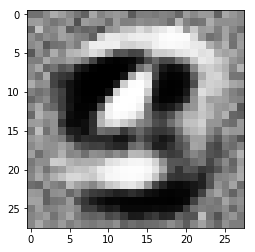

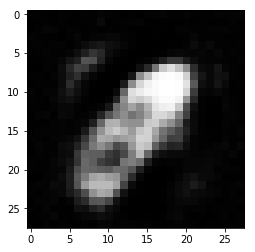

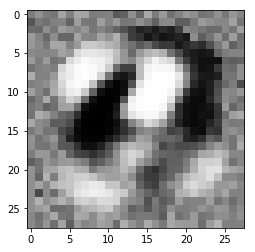

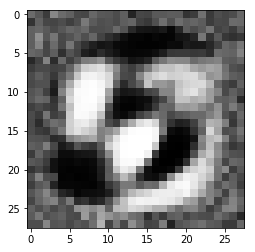

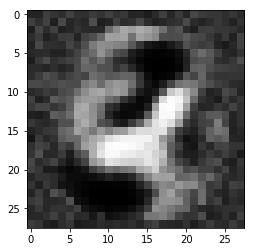

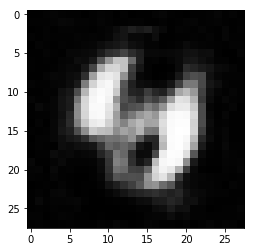

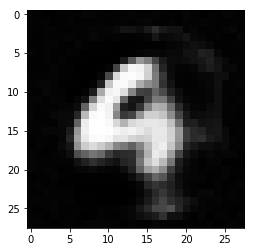

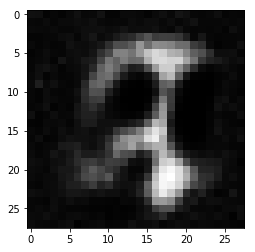

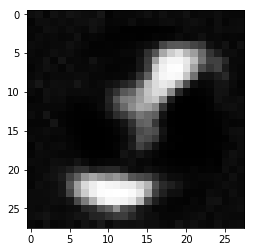

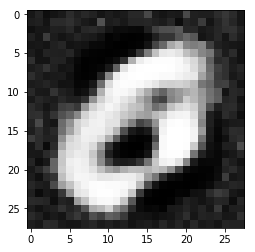

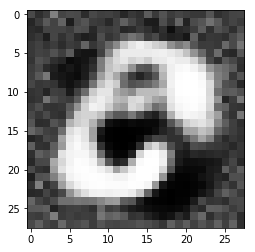

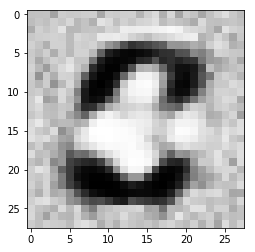

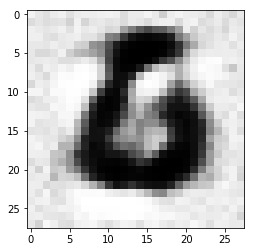

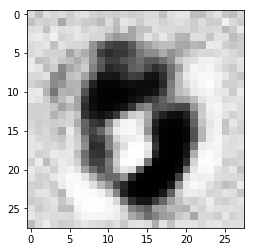

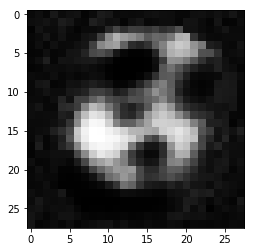

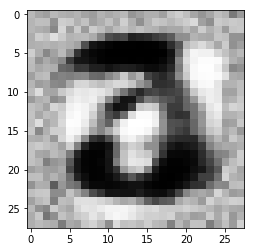

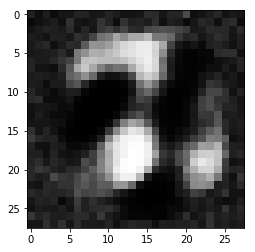

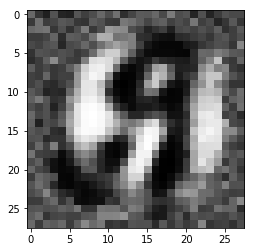

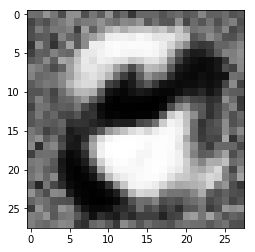

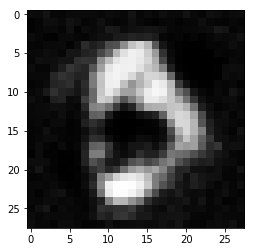

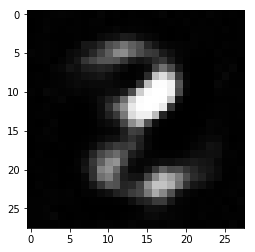

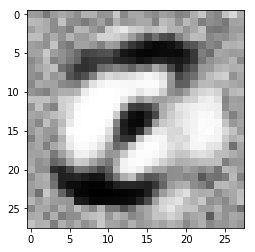

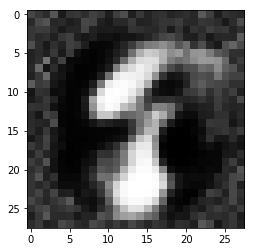

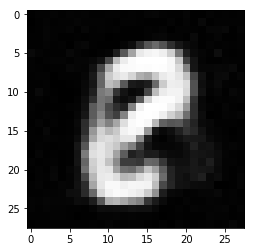

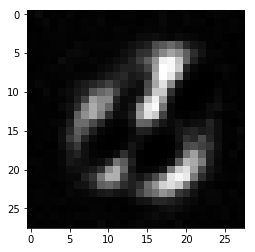

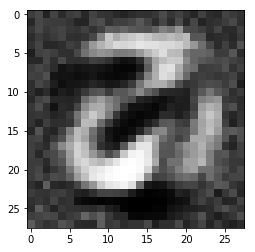

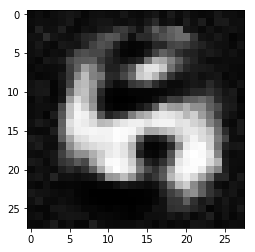

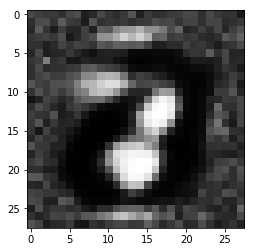

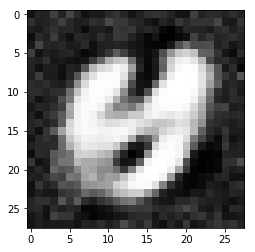

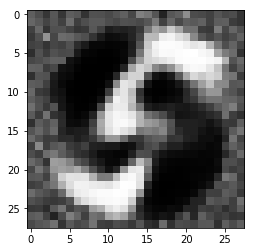

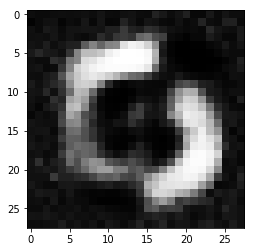

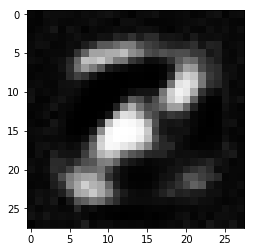

In [42]:
decoder.eval()
with torch.no_grad():
    for i in range(100):
        z = torch.rand(64) * 2 - 1
        x_hat = decoder(z)
        plt.imshow(x_hat.reshape(28, 28).numpy(), cmap='gray')
        plt.show()

In [ ]:
[-1, 1]^64